Las metricas para medir una division

Cuando seleccionamos la mejor combinacion de caracteristicas y valores para dividir un punto en dos criterios, la impureza Gini y su informacion de ganancia puede ser usado como una medidad de separacion de calidad.  

Gini impureza como su nombre lo indica, mide la tasa de impurezas de clase, la clase velocidad de mezcla para un conjunto de datos con clases K, suponga que los datos de la clase k:
(1 <= k <= k) toma una fraccion
fk(0 <= fk <= 1)
En casos binarios Gini impurity se encuentra bajo diferentes valores de clases positivas fraccionarias que pueden ser visualizadas con el siguiente codigo:

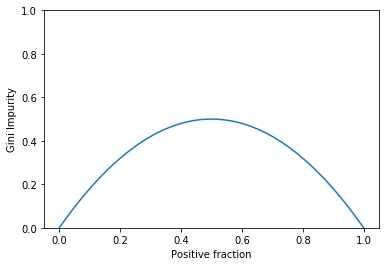

In [12]:
import matplotlib.pyplot as plt
import numpy as np
pos_fraction = np.linspace(0.00, 1.00, 1000)
plt.plot(pos_fraction, gini)
gini = 1 - pos_fraction**2 - (1-pos_fraction)**2
plt.ylim(0,1)
plt.xlabel('Positive fraction')
plt.ylabel('Gini Impurity')
plt.show()

In [13]:
def gini_impurity(labels):
    counts = np.unique(labels, return_counts = True)[1]
    fractions = counts / float(len(labels))
    return 1 - np.sum(fractions ** 2)
print('{0:.4f}'.format(gini_impurity([1,1,0,1,0])))
print('{0:.4f}'.format(gini_impurity([1,1,0,1,0,0])))
print('{0:.4f}'.format(gini_impurity([1,1,1,1])))

0.4800
0.5000
0.0000


En orden de evaluar la calidad de la division nosotros simplemennte agregamos la impureza, de los resultados de los subgrupos combinando las porciones de cada uno de los subgrupos que corresponden a los factores de peso. Y de nuevo la pequeña ponderacion sumada de la impureza Gini, los mejores resultados se dividen. 

Entropia  es la media probabilistica de la incertidumbre, dandole a K-class un dataset y fk 0 <= fk <=1
denotado la fraccion del dato desde la clase k(1 <= k <= K).
Similarmente nosotros podemos visualizar como la entropia cambia debajo de diferentes valores de las clases positivas, fraccionarias en casos binarios como el siguiente codigo:

/home/daniel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log2
  
/home/daniel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  
/home/daniel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log2
  This is separate from the ipykernel package so we can avoid doing imports until
/home/daniel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until


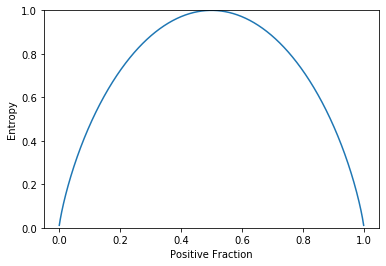

In [16]:
pos_fraction = np.linspace(0.00, 1.00, 1000)
ent = - (pos_fraction * np.log2(pos_fraction) +
(1 - pos_fraction) * np.log2(1 - pos_fraction))
plt.plot(pos_fraction, ent)
plt.xlabel('Positive Fraction')
plt.ylabel('Entropy')
plt.ylim(0, 1)
plt.show()

Se le da etiquetas al dataset, la calculacion de la funcion de la entropia puede ser implementada de la siguiente manera:

In [33]:
def entropy (labels):
    if not labels:
        return 0
    counts = np.unique(labels, return_counts = True)[1]
    fractions = counts / float(len(labels))
    return - np.sum(fractions * np.log2(fractions))

Ahora que hemos entendido completamente la entropía, ahora podemos buscar información
ganancia midiendo cuánta incertidumbre se reduce después de la división, que es definido como la diferencia de entropía antes de una división (padre) y después de la división (hijos):

Informacion Gain = Entropy(before) - Entropy(after) = Entropy(parent) - Entropy(children)
La entropía después de una división se calcula como la suma ponderada de entropía de cada hijo,
de manera similar a la impureza de Gini ponderada.

Durante el proceso de construcción de un nodo en un árbol, nuestro objetivo es buscar un
punto de división donde se obtiene la máxima ganancia de información. Como la entropía del nodo padre no ha cambiado, solo necesitamos medir la entropía de hijos resultantes debido a una división. 

La mejor división es la que tiene menos entropía de hijos resultantes.

En general, la elección de dos métricas, la impureza de Gini y la ganancia de información, tiene
poco efecto en el rendimiento del árbol de decisión entrenado. Ambos miden la impureza ponderada de los niños después de una separación. Podemos combinarlos en una función que calcula la impureza ponderada:



In [34]:
criterion_function = {'gini' : gini_impurity, 'entropy' : entropy}
def weighted_impurity(groups, criterion = 'gini'):
    """
     Calcula le medicion de impurezas de los hijos despues de dividirlos
     groups(list de hijos, e hijos consiste en la etiqueta de clases)
     criterios (metricas de medidas de calidad de division 'gini' para impurezas Gini o entropia
     para la informacion de ganancia)
     Returns:
     float, medido de impurezas
    """
    total = sum(len(group) for group in groups)
    weighted_sum = 0.0
    for group in groups:
        weighted_sum += len(group) / float(total) * criterion_function[criterion](group)
    return weighted_sum

In [35]:
children_1 = [[1, 0, 1], [0, 1]]
children_2 = [[1, 1], [0, 0, 1]]
print('Entropy of #1 split: {0:.4f}'.format(weighted_impurity(children_1, 'entropy')))
print('Entropy of #2 split:{0:.4f}'.format(weighted_impurity(children_2, 'entropy')))

Entropy of #1 split: 0.9510
Entropy of #2 split:0.5510


La implementacion de un arbol de decicion


In [39]:
def gini_impurity(labels):
  # When the set is empty, it is also pure
  if labels.size == 0:
    return 0
  # Count the occurrences of each label
  counts = np.unique(labels, return_counts=True)[1]
  fractions = counts / float(len(labels))
  return 1 - np.sum(fractions ** 2)

def entropy(labels):
  # When the set is empty, it is also pure
  if labels.size == 0:
    return 0
  counts = np.unique(labels, return_counts=True)[1]
  fractions = counts / float(len(labels))
  return - np.sum(fractions * np.log2(fractions))

Lo siquiente, debemos definir una funcion de utilidad para dividir el nodo dentro de la izquierda y la derecha, basado en un valor:

In [47]:
def split_node(X, y, index, value):
    """ Split data set X, y based on a feature and a value
    Args:
         X, y (numpy.ndarray, data set)
         index (int, index of the feature used for splitting)
         value (value of the feature used for splitting)
    Returns:
         list, list: left and right child, a child is in the
         format of [X, y]
    """
    x_index=X[:, index]
    #if this feature is numerical
    if X[0, index].dtype.kind in ['i', 'f']:
        mask=x_index >= value
    #if this feature is categorical
    else:
        mask=x_index == value
    #split into left and right child
    left=[X[~mask, :], y[~mask]]
    right = [X[mask, :], y[mask]]
    return left, right

Con las funciones de generación y medición de división disponibles, ahora
definir la función de búsqueda, probando todas las divisiones posibles y devolviendo el
el mejor dado un criterio de selección, junto con los hijos resultantes:



In [46]:
def get_best_split(X, y, criterion):
    """ Obtain the best splitting point and resulting children
       for the data set X, y
    Args:
        X, y (numpy.ndarray, data set)
        criterion (gini or entropy)
    Returns:
    dict {index: index of the feature, value: feature
            value, children: left and right children}
    """
    best_index, best_value, best_score, children = None, None, 1, None

    for index in range(len(X[0])):
        for value in np.sort(np.unique(X[:, index])):
            groups = split_node(X, y, index, value)
            impurity = weighted_impurity(
                       [groups[0][1], groups[1][1]], criterion)
            if impurity < best_score: best_index, best_value, best_score, children = index, value, impurity, groups
    return {'index': best_index, 'value': best_value,
            'children': children}

In [59]:
def get_leaf(labels):
   #Obtain the leaf as the majority of the labels
   return np.bincount(labels).argmax()

Y, finalmente, la función recursiva que une todo esto mediante:

Asignación de un nodo hoja si uno de los dos nodos hijos está vacío
Asignación de un nodo hoja si la profundidad de la rama actual excede la profundidad máxima permitida
Asignación de un nodo hoja si no contiene suficientes muestras necesarias para una nueva división de lo contrario, continúa con divisiones adicionales con el punto de división óptimo



In [82]:
def split(node, max_depth, min_size, depth, criterion):
    """ Split children of a node to construct new nodes or
        assign them terminals
    Args:
       node (dict, with children info)
       max_depth (int, maximal depth of the tree)
       min_size (int, minimal samples required to further split a child)
       depth (int, current depth of the node)
       criterion (gini or entropy)
    """
    left, right = node['children']
    del (node['children'])
    if left[1].size == 0:
        node['right'] = get_leaf(right[1])
        return
    if right[1].size == 0:
        node['left'] = get_leaf(left[1])
        return
    #Check if the current depth exceeds the maximal depth
    if depth >= max_depth:
        node['left'], node['right'] = get_leaf(left[1]), get_leaf(right[1])
        return
    #Check if the left child has enough samples
    if left[1].size <= min_size:
        node['left'] = get_leaf(left[1])
    else:
        #It has enough samples, we further split it
        result = get_best_split(left[0], left[1], criterion) 
        result_left, result_right = result['children']
        if result_left[1].size == 0:
            node['left'] = get_leaf(result_right[1])
        elif result_right[1].size == 0:
            node['left'] = get_leaf(result_left[1])
        else:
            node['left'] = result
            split(node['left'], max_depth, min_size,
                                                        depth + 1, criterion)
    #Check if the right child has enough samples
    if right[1].size <= min_size:
        node['right'] = get_leaf(right[1])
    else:
    #It has enough samples, we further split it
        result = get_best_split(right[0], right[1], criterion)
        result_left, result_right = result['children']
        if result_left[1].size == 0:
            node['right'] = get_leaf(result_right[1])
        elif result_right[1].size == 0:
            node['right'] = get_leaf(result_left[1])
        else:
            node['right'] = result
            split(node['right'], max_depth, min_size,
                                    depth + 1, criterion)
    


Enseguida el punto de entrada de construccion del arbol:

In [92]:
def train_tree(X_train, y_train, max_depth, min_size,
               criterion='gini'):
    """ Construction of a tree starts here
    Args:
        X_train, y_train (list, list, training data)
        max_depth (int, maximal depth of the tree)
        min_size (int, minimal samples required to further
                   split a child)
        criterion (gini or entropy)
    """
    X = np.array(X_train)
    y = np.array(y_train)
    root = get_best_split(X, y, criterion)
    split(root, max_depth, min_size, 1, criterion)
    return root

Ahora probemos el test precediendo del calculo manual:

In [93]:
X_train = [['tech', 'professional'],
           ['fashion', 'student'],
           ['fashion', 'professional'],
           ['sports', 'student'],
           ['tech', 'student'],
           ['tech', 'retired'],
           ['sports', 'professional']]
y_train = [1, 0, 0, 0, 1, 0, 1]
tree = train_tree(X_train, y_train, 2, 2)

Para verificar el arbol de entrenamiento es identico al que construimos escribimos una funcion que muestra  el arbol.

In [95]:
CONDITION = {'numerical': {'yes': '>=', 'no': '<'},
             'categorical': {'yes': 'is', 'no': 'is not'}}
def visualize_tree(node, depth=0):
    if isinstance(node, dict):
        if node['value'].dtype.kind in ['i', 'f']:
            condition = CONDITION['numerical']
        else:
            condition = CONDITION['categorical']
        print('{}|- X{} {} {}'.format(depth * ' ',
            node['index'] + 1, condition['no'], node['value']))
        if 'left' in node:
            visualize_tree(node['left'], depth + 1)
        print('{}|- X{} {} {}'.format(depth * ' ',
          node['index'] + 1, condition['yes'], node['value']))
        if 'right' in node:
            visualize_tree(node['right'], depth + 1)
    else:
        print('{}[{}]'.format(depth * ' ', node))

In [96]:
visualize_tree(tree)

|- X1 is not fashion
 |- X2 is not professional
  [0]
 |- X2 is professional
  [1]
|- X1 is fashion
 [0]


In [98]:
X_train_n = [[6, 7],
            [2, 4],
            [7, 2],
            [3, 6],
            [4, 7],
            [5, 2],
            [1, 6],
            [2, 0],
            [6, 3],
            [4, 1]]
y_train_n =[0, 0, 0, 0, 0, 1, 1, 1, 1, 1] 
tree = train_tree(X_train_n, y_train_n, 2, 2)
visualize_tree(tree)

|- X2 < 4
 |- X1 < 7
  [1]
 |- X1 >= 7
  [0]
|- X2 >= 4
 |- X1 < 2
  [1]
 |- X1 >= 2
  [0]


Ahora que tenemos una comprensión más sólida del árbol de decisión al darnos cuenta
desde cero, podemos probar el paquete del árbol de decisiones de scikit-learn, que es
ya bien desarrollado.

In [121]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
tree_sk = DecisionTreeClassifier(criterion='gini', 
                             max_depth=2, min_samples_split=2)
tree_sk.fit(X_train_n, y_train_n)

export_graphviz(tree_sk, out_file='tree.dot',
    feature_names=['X1', 'X2'], impurity=False, filled=True,
    class_names=['0', '1'])